In [7]:
import json
import os
import matplotlib.pyplot as plt
import copy

In [8]:
datasets_root = f'/disk/ml/datasets/'
coda_root = f'/disk/ml/own_datasets/CODA/'

model_root = os.path.realpath('../../../model_contradictions/')
graphics_root = os.path.join(model_root, 'graphics')

json_cornercases = os.path.join(coda_root, 'corner_case.json')
json_annotation = os.path.join(coda_root, 'annotation_count.json')

In [9]:
titles = ['CODA', 'CODA-ONCE', 'CODA-KITTI', 'CODA-nuScenes']

with open(json_cornercases, 'r') as f:
    data_cornercases = json.load(f)
    
categories = data_cornercases['categories']
all_categories = copy.deepcopy(categories)
once_categories = copy.deepcopy(categories)
kitti_categories = copy.deepcopy(categories)
nuscenes_categories = copy.deepcopy(categories)
categorie_list = [all_categories, once_categories, kitti_categories, nuscenes_categories]

annotations = data_cornercases['annotations']
all_annotations = annotations
once_annotations = annotations[:4413]
kitti_annotations = annotations[4413:4813]
nuscenes_annotations = annotations[4813:]
annotation_list = [all_annotations, once_annotations, kitti_annotations, nuscenes_annotations]

supercategories = [['pedestrian', 0], ['cyclist', 0], ['vehicle', 0], ['animal', 0], ['traffic_facility', 0], ['obstruction', 0], ['misc', 0]]
all_supercategories = copy.deepcopy(supercategories)
once_supercategories = copy.deepcopy(supercategories)
kitti_supercategories = copy.deepcopy(supercategories)
nuscenes_supercategories = copy.deepcopy(supercategories)
supercategorie_list = [all_supercategories, once_supercategories, kitti_supercategories, nuscenes_supercategories]

In [10]:
for index in range(4):
    for i, supercategorie in enumerate(supercategorie_list[index]):
        for categorie in categorie_list[index]:
            if categorie['supercategory'] == supercategorie[0]:
                for annotation in annotation_list[index]:
                    if annotation['category_id'] == categorie['id']:
                        supercategorie[1] = supercategorie[1] + 1

In [11]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i]+10,y[i], ha = 'center')

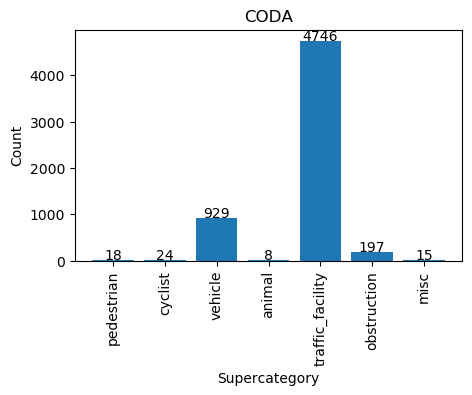

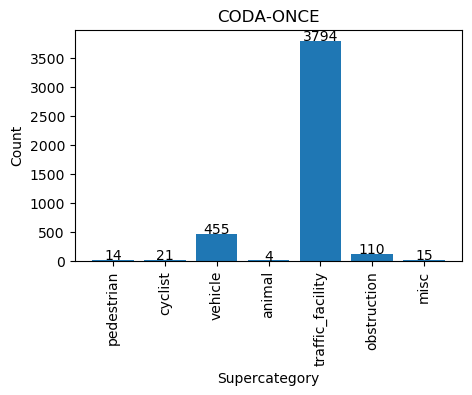

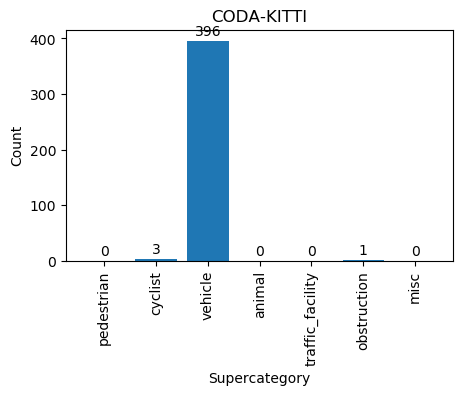

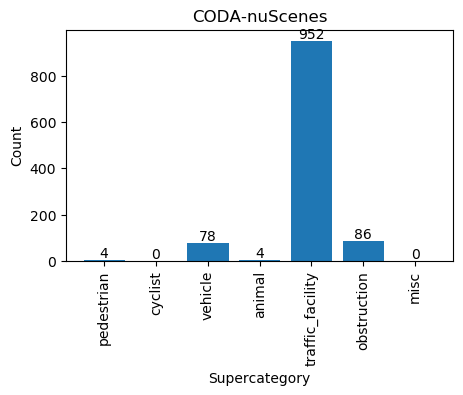

In [12]:
for index in range(4):
    # Create a list of object names and their counts
    objects = [item[0] for item in supercategorie_list[index]]
    counts = [item[1] for item in supercategorie_list[index]]

    # Create a vertical bar plot
    fig, ax = plt.subplots(figsize=(5, 3))
    ax.bar(objects, counts)

    # Set plot title and axis labels
    addlabels(objects, counts)
    ax.set_title(titles[index])
    ax.set_xlabel('Supercategory')
    ax.set_ylabel('Count')
    plt.xticks(objects, objects, rotation='vertical')

    fig.savefig(os.path.join(graphics_root, f'annotation_count_{titles[index]}.svg'), format='svg', dpi=1200)
    # Display the plot
    plt.show()
    plt.close()